## Objective ##

In this lab, you will:

Load and preprocess the dataset used in previous labs.

Implement K-Nearest Neighbors (KNN) Regression and Random Forest Regression.

Evaluate model performance using R² Score, Mean Squared Error (MSE), and visualization.

Compare the performance of both models.


**Part 2**

Import Required Libraries

Import the necessary libraries before starting the lab.





In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Part 3**

Load the dataset from Graded Lab 1 and prepare it for analysis.


In [2]:
# Load datasets
car_df = pd.read_csv("car_price_dataset.csv")
mp_df = pd.read_csv("mobileprice.csv")
steam_df = pd.read_csv("steam_games.csv")

# You can inspect the first few rows of each dataset to check the structure
print(car_df.head())
print(mp_df.head())
print(steam_df.head())


        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615   

**Part 4**

Define Features (X) and Target (y)

In [3]:
# For car price dataset
X_car = car_df[['Engine_Size']]  # Features
y_car = car_df['Price']  # Target

# For mobile price dataset
X_mp = mp_df.drop('price_range', axis=1)  # Features
y_mp = mp_df['price_range']  # Target

# For steam games dataset
X_steam = steam_df.drop('price_initial (USD)', axis=1)  # Features
y_steam = steam_df['price_initial (USD)']  # Target


**Part 5**

Implement K-Nearest Neighbors (KNN) Regression


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
knn = KNeighborsRegressor(n_neighbors=5)  # Adjust the number of neighbors as needed
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R2 Score: {r2_knn}")


KNN Mean Squared Error: 8881113.558319999
KNN R2 Score: 0.03338099380449999


**Part 6**

Implement Random Forest Regression


In [5]:
# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")


Random Forest Mean Squared Error: 8168661.743787869
Random Forest R2 Score: 0.11092413751085084


**Part 7**

Compare Predictions with Scatter Plots

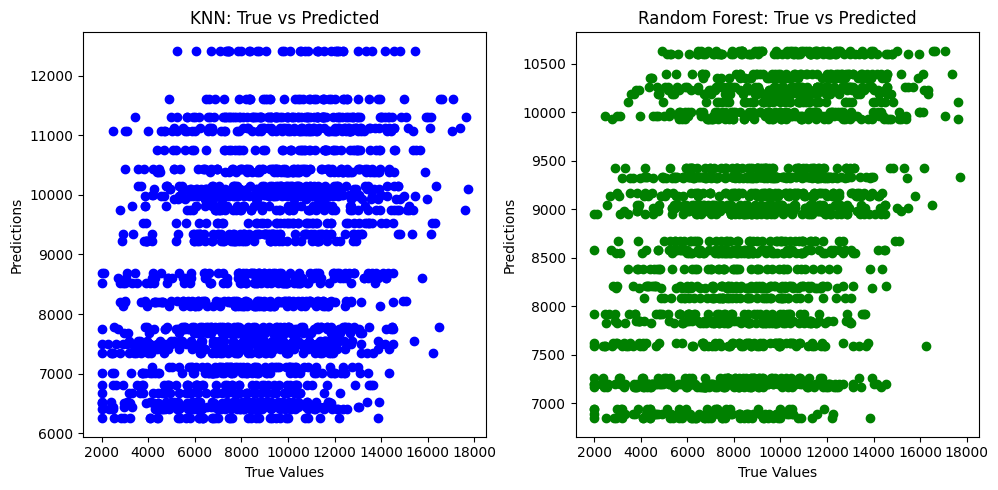

In [6]:
import matplotlib.pyplot as plt

# Scatter plot for KNN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue', label='KNN Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN: True vs Predicted')

# Scatter plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='RF Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest: True vs Predicted')

plt.tight_layout()
plt.show()
